In [38]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [39]:
cd '/content/gdrive/My Drive/data2'

/content/gdrive/My Drive/data2


In [0]:
directort_train='/content/gdrive/My Drive/data2/dataset'

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPool2D,Flatten
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [0]:
cl=Sequential() 

In [0]:
# convolution layer - 32 feature detectors of 3x3 shape plus a rectifier on top of our convolved feature map
cl.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [0]:
# max pooling layer - of 2x2 shape
cl.add(MaxPool2D(pool_size=(2,2)))

In [0]:
#another convolution layer
cl.add(Conv2D(32,(3,3),activation='relu'))

In [0]:
#another max pooling layer
cl.add(MaxPool2D(pool_size=(2,2)))

In [0]:
#another convolution layer
cl.add(Conv2D(32,(3,3),activation='relu'))

In [0]:
# max pooling layer - of 2x2 shape
cl.add(MaxPool2D(pool_size=(2,2)))

In [0]:
#another convolution layer
cl.add(Conv2D(32,(3,3),activation='relu'))

In [0]:
# max pooling layer - of 2x2 shape
cl.add(MaxPool2D(pool_size=(2,2)))

In [0]:
#flattening layer
cl.add(Flatten())

In [0]:
#Fully Connected Layer
cl.add(Dense(units=128,activation='relu'))

In [0]:
#Output Layer
cl.add(Dense(units=1,activation='sigmoid'))

In [0]:
cl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split


In [56]:
train_generator = train_datagen.flow_from_directory(
    directort_train,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary',
    subset='training') # set as training data

Found 56 images belonging to 2 classes.


In [57]:
validation_generator = train_datagen.flow_from_directory(
     directort_train, # same directory as training data
    target_size=(64,64),
    batch_size=32,
    class_mode='binary',
    subset='validation') # set as validation data

Found 14 images belonging to 2 classes.


In [0]:

cl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
import os
from keras.callbacks import ModelCheckpoint
filepath = "/content/gdrive/My Drive/data2/saved/weights-improvement-{epoch:02d}-{loss: .4f}.hdf5"
checkpoint_dir = os.path.dirname(filepath)



In [0]:
# Create a callback that saves the model's weights
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [0]:
#Continue training
history=cl.fit_generator(train_generator,
                         steps_per_epoch=20,                         
                         epochs=30,                                
                         validation_data=validation_generator,
                         validation_steps=2500,                         
                         callbacks=callbacks_list)    

Epoch 1/30
20/20 [==============================] - 1022s 51s/step - loss: 0.6681 - accuracy: 0.6100 - val_loss: 0.7048 - val_accuracy: 0.7149

Epoch 00001: loss improved from inf to 0.66838, saving model to /content/gdrive/My Drive/data2/saved/weights-improvement-01- 0.6684.hdf5
Epoch 2/30
20/20 [==============================] - 1019s 51s/step - loss: 0.5368 - accuracy: 0.7367 - val_loss: 0.7287 - val_accuracy: 0.4521

Epoch 00002: loss improved from 0.66838 to 0.53759, saving model to /content/gdrive/My Drive/data2/saved/weights-improvement-02- 0.5376.hdf5
Epoch 3/30
20/20 [==============================] - 1021s 51s/step - loss: 0.3489 - accuracy: 0.8083 - val_loss: 0.8893 - val_accuracy: 0.6319

Epoch 00003: loss improved from 0.53759 to 0.34913, saving model to /content/gdrive/My Drive/data2/saved/weights-improvement-03- 0.3491.hdf5
Epoch 4/30
20/20 [==============================] - 1022s 51s/step - loss: 0.3096 - accuracy: 0.8167 - val_loss: 0.4291 - val_accuracy: 0.6353

Epoch

In [29]:

from keras.models import load_model
model=load_model('/content/gdrive/My Drive/data2/saved/weights-improvement-23--153225.6941.hdf5')
model.fit(train_generator,
                         steps_per_epoch=20,                         
                         epochs=6,                                
                         validation_data=validation_generator,
                         validation_steps=2500,                         
                         callbacks=callbacks_list)

Epoch 1/6
20/20 [==============================] - 1033s 52s/step - loss: -148384.3518 - accuracy: 0.8150 - val_loss: 814074.3125 - val_accuracy: 0.5782

Epoch 00001: loss improved from inf to -150855.23963, saving model to /content/gdrive/My Drive/data2/saved/weights-improvement-01--150855.2396.hdf5
Epoch 2/6
20/20 [==============================] - 1019s 51s/step - loss: -353201.9573 - accuracy: 0.8000 - val_loss: 2165117.7500 - val_accuracy: 0.5610

Epoch 00002: loss improved from -150855.23963 to -353172.70954, saving model to /content/gdrive/My Drive/data2/saved/weights-improvement-02--353172.7095.hdf5
Epoch 3/6
20/20 [==============================] - 1020s 51s/step - loss: -307064.3912 - accuracy: 0.8250 - val_loss: 390222.4688 - val_accuracy: 0.6326

Epoch 00003: loss did not improve from -353172.70954
Epoch 4/6
20/20 [==============================] - 1021s 51s/step - loss: -467001.8120 - accuracy: 0.7933 - val_loss: 3616515.2500 - val_accuracy: 0.5805

Epoch 00004: loss impro

In [62]:
from keras.models import load_model

model=load_model('/content/gdrive/My Drive/data2/saved/weights-improvement-06--1089140.9504.hdf5')

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 32)         

In [63]:
# Evaluate the restored model
loss, acc = model.evaluate(train_generator, verbose=2)
print(loss,acc)
loss1, acc1 = model.evaluate(validation_generator , verbose=2)
print(loss1,acc1)

223438.171875 0.875
8257823.5 0.5


In [65]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [0]:
def test_unseen(filename):
    test_image =  image.load_img(filename, target_size = (64, 64))
    # converting to a 3D array
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)
    
    if result[0][0] == 0:
        prediction = "COVID PATIENT"
    else:
        prediction = "NORMAL PATIENT"
        
    return prediction
    

In [0]:
path='/content/gdrive/My Drive/data2/val'

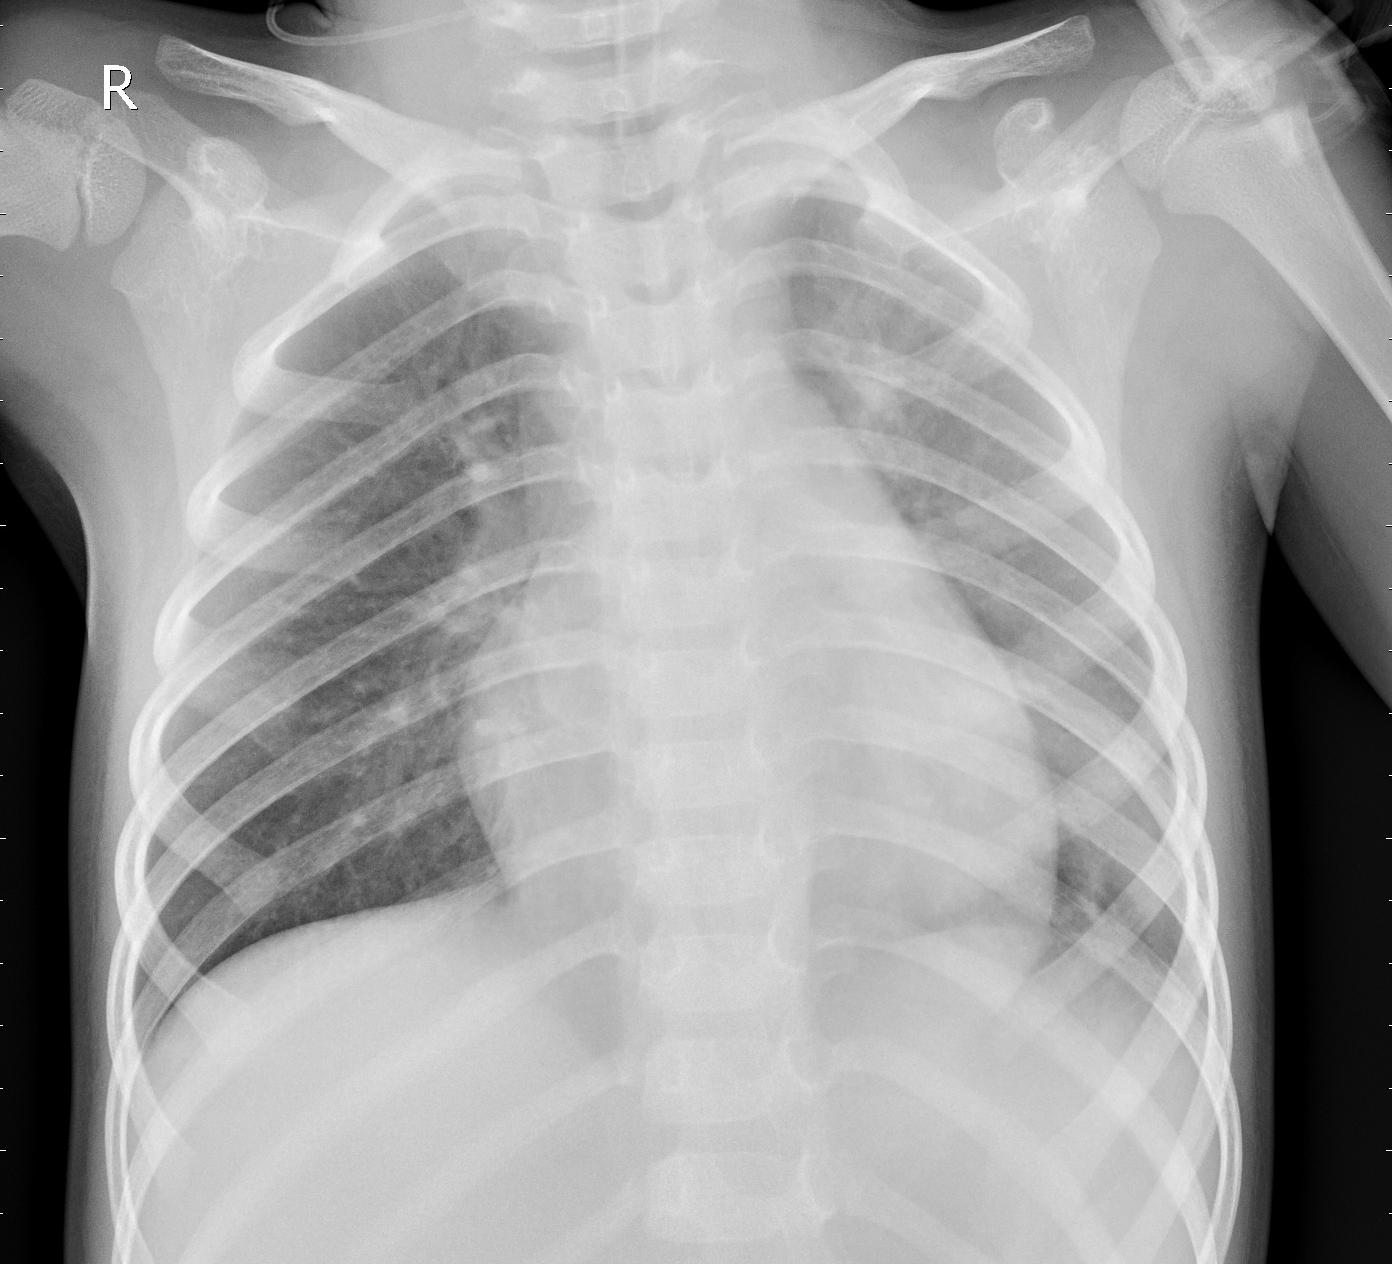

In [76]:
from IPython.display import Image
Image(filename='/content/gdrive/My Drive/data2/val/6.jpeg')

In [73]:
test_unseen('/content/gdrive/My Drive/data2/val/6.jpeg')


'NORMAL PATIENT'

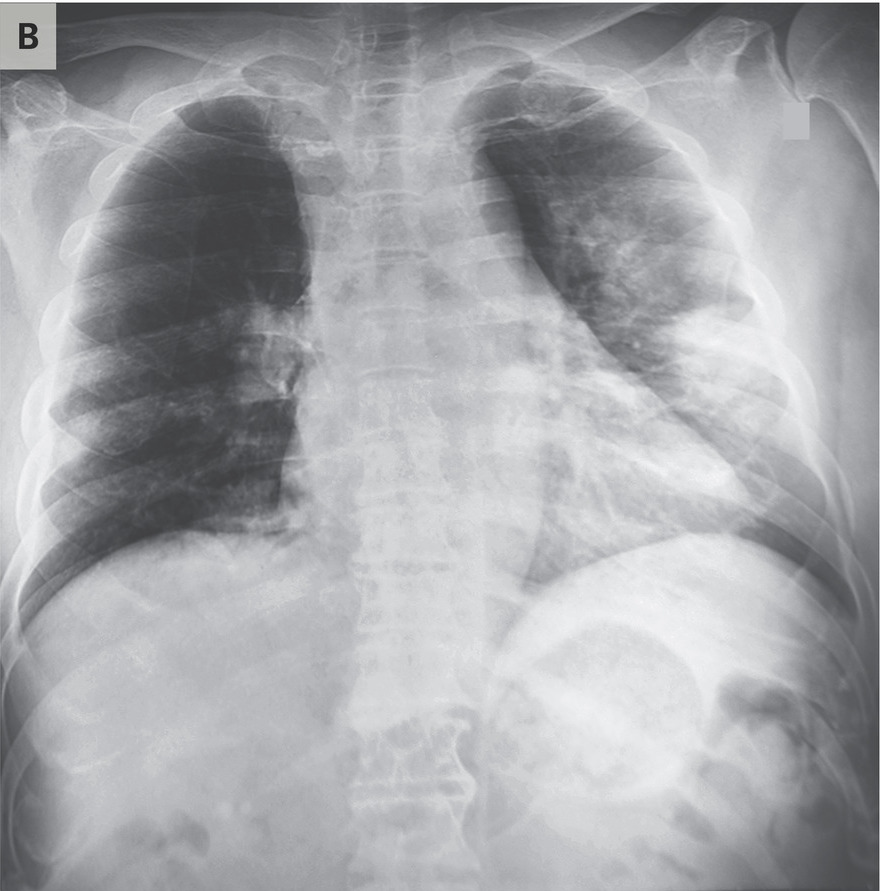

In [77]:
from IPython.display import Image
Image(filename='/content/gdrive/My Drive/data2/val/2.jpeg')

In [78]:
test_unseen('/content/gdrive/My Drive/data2/val/2.jpeg')

'COVID PATIENT'

In [79]:
import os
import glob
for infile in glob.glob( os.path.join(path, '*.jpeg') ):
   print(test_unseen(infile))

COVID PATIENT
COVID PATIENT
COVID PATIENT
NORMAL PATIENT
NORMAL PATIENT
NORMAL PATIENT
